<a href="https://colab.research.google.com/github/AryaPratamaPutra-10/AryaPratamaPutra-10/blob/main/Analisis%20Data%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Volume Ikan Lele


1. Import Library yang dipakai

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

from statsmodels.tsa.arima.model import ARIMA

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

2. Import File Data Set

In [4]:
from google.colab import files
upload = files.upload()

Saving Harga_Lele.csv to Harga_Lele.csv


Tampilin Data

In [5]:
df = pd.read_csv('/content/Harga_Lele.csv', sep=';')
df.head()

,Provinsi,Kabupaten/Kota,Tahun,Volume Produksi,Nilai Produksi
0,ACEH,ACEH BARAT,2019,247150,3.707250e+09
1,ACEH,ACEH BARAT DAYA,2019,50900,1.527000e+09
2,ACEH,ACEH BESAR,2019,1250560,1.970712e+10
3,ACEH,ACEH JAYA,2019,900000,1.800000e+10
4,ACEH,ACEH SELATAN,2019,39367,1.181010e+09


3. Memisahkan Fitur dan Target

In [6]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer # Import ColumnTransformer

# Membaca file CSV ke dalam DataFrame
Harga_Lele = pd.read_csv('/content/Harga_Lele.csv', sep=';')

# Assign Harga_Lele to data
data = Harga_Lele

# cetak nama
print(data.columns)

# Fitur (tahun)
X = data[['Tahun', 'Provinsi']]

# Target: volume_produksi dan nilai_produksi
y_volume = data['Volume Produksi']
y_nilai = data['Nilai Produksi']

# OneHotEncoding untuk kolom 'daerah'
preprocessor = ColumnTransformer(transformers=[('Provinsi', OneHotEncoder(), ['Provinsi'])], remainder='passthrough')

# Transformasi X
X_transformed = preprocessor.fit_transform(X)



Index(['Provinsi', 'Kabupaten/Kota', 'Tahun', 'Volume Produksi',
       'Nilai Produksi'],
      dtype='object')


In [9]:
print(X.head()) # fitur
print(y_volume.head()) # target
print(y_nilai.head()) # target

   Tahun Provinsi
0   2019     ACEH
1   2019     ACEH
2   2019     ACEH
3   2019     ACEH
4   2019     ACEH
0     247150
1      50900
2    1250560
3     900000
4      39367
Name: Volume Produksi, dtype: int64
0    3.707250e+09
1    1.527000e+09
2    1.970712e+10
3    1.800000e+10
4    1.181010e+09
Name: Nilai Produksi, dtype: float64


3 split dataset into training

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix, hstack # Import hstack

features = df[['Tahun', 'Volume Produksi', 'Nilai Produksi']]  # Include desired columns

# Extract the target variable
target = df['Volume Produksi'] # Assuming 'Volume Produksi' is the target

# Split data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# If you need to convert X_train and X_test into sparse matrices:
X_train_sparse = csr_matrix(X_train)
X_test_sparse = csr_matrix(X_test)

# If you have 'Tahun' column and want to include it in features:
X_train_with_tahun = hstack([X_train_sparse, csr_matrix(X_train[['Tahun']])])
X_test_with_tahun = hstack([X_test_sparse, csr_matrix(X_test[['Tahun']])])



4 create a Linear Regression Model, Train Model, dan Evaluasi

Text(0.5, 0, 'Tahun')

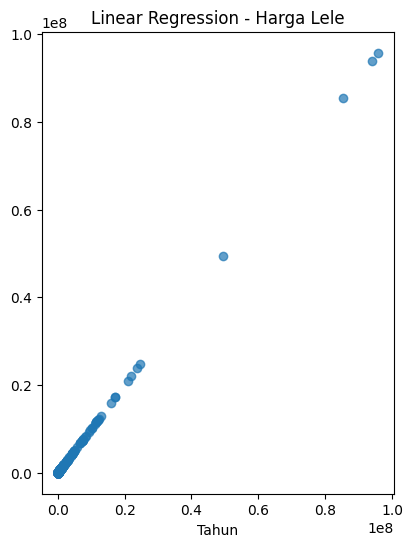

In [60]:

features = df[['Tahun', 'Volume Produksi', 'Nilai Produksi']]  # Include desired columns

# Extract the target variable
target = df['Volume Produksi'] # Assuming 'Volume Produksi' is the target

# Split data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Instead of splitting y_volume again, use y_train and y_test directly for volume prediction
y_volume_train = y_train
y_volume_test = y_test

# If you need to convert X_train and X_test into sparse matrices:
X_train_sparse = csr_matrix(X_train)
X_test_sparse = csr_matrix(X_test)

# If you have 'Tahun' column and want to include it in features:
X_train_with_tahun = hstack([X_train_sparse, csr_matrix(X_train[['Tahun']])])
X_test_with_tahun = hstack([X_test_sparse, csr_matrix(X_test[['Tahun']])])

# ... (rest of your code remains the same)

# Assuming you have a 'Nilai Produksi' column for y_nilai
y_nilai = df['Nilai Produksi']  # Assuming 'Nilai Produksi' is the target for nilai prediction
_, _, y_nilai_train, y_nilai_test = train_test_split(
    features, y_nilai, test_size=0.2, random_state=42
)

# ... (rest of your code remains the same)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_volume_train) # Use y_volume_train which is now aligned with X_train

# Predict on the training and testing data
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

# Now you can plot the data
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)

# Changed y_test and y_pred_lin to y_volume_test and y_pred_test
plt.scatter(y_volume_test, y_pred_test, alpha=0.7)

plt.title('Linear Regression - Harga Lele')
plt.plot([0, 5], [0, 5], '--', color='red')
plt.xlabel('Tahun')  # Adjust

LSTM

1. Pra pemrosen data


In [61]:
# 1. Pra-pemrosesan Data
features = ['Tahun', 'Volume Produksi', 'Nilai Produksi']
data = df[features].values.astype('float32')

# Penskalaan data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# Membagi data menjadi data training dan testing
train_size = int(len(data) * 0.8)
train_data, test_data = data[0:train_size, :], data[train_size:len(data), :]

# Membuat dataset untuk LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), :]  # Ambil semua fitur untuk look_back periode
        X.append(a)
        Y.append(dataset[i + look_back, 1])  # Target adalah 'Volume Produksi' di periode berikutnya
    return np.array(X), np.array(Y)

look_back = 3  # Jumlah periode waktu sebelumnya untuk dipertimbangkan (misalnya, 3 tahun)
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)


2. Membuat Model LSTM

In [41]:
# 2. Membuat Model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))  # Output layer memprediksi volume produksi

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3. Training Model

In [42]:
# 3. Training Model
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
56/56 - 4s - 74ms/step - loss: 0.0041
Epoch 2/100
56/56 - 1s - 11ms/step - loss: 0.0040
Epoch 3/100
56/56 - 1s - 10ms/step - loss: 0.0040
Epoch 4/100
56/56 - 0s - 5ms/step - loss: 0.0040
Epoch 5/100
56/56 - 1s - 11ms/step - loss: 0.0040
Epoch 6/100
56/56 - 0s - 5ms/step - loss: 0.0039
Epoch 7/100
56/56 - 0s - 6ms/step - loss: 0.0040
Epoch 8/100
56/56 - 1s - 11ms/step - loss: 0.0040
Epoch 9/100
56/56 - 1s - 12ms/step - loss: 0.0039
Epoch 10/100
56/56 - 1s - 11ms/step - loss: 0.0040
Epoch 11/100
56/56 - 1s - 11ms/step - loss: 0.0039
Epoch 12/100
56/56 - 0s - 6ms/step - loss: 0.0039
Epoch 13/100
56/56 - 1s - 11ms/step - loss: 0.0039
Epoch 14/100
56/56 - 0s - 5ms/step - loss: 0.0039
Epoch 15/100
56/56 - 0s - 5ms/step - loss: 0.0039
Epoch 16/100
56/56 - 0s - 5ms/step - loss: 0.0039
Epoch 17/100
56/56 - 0s - 5ms/step - loss: 0.0039
Epoch 18/100
56/56 - 0s - 6ms/step - loss: 0.0039
Epoch 19/100
56/56 - 1s - 11ms/step - loss: 0.0038
Epoch 20/100
56/56 - 1s - 11ms/step - loss: 0.003

4. Prediksi dan Evaluasi

In [62]:
# 4. Prediksi dan Evaluasi
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inversi scaling untuk mendapatkan nilai aktual
train_predict = scaler.inverse_transform(np.concatenate((X_train[:, -1, [0, 2]], train_predict), axis=1))[:, 1]
y_train = scaler.inverse_transform(np.concatenate((X_train[:, -1, [0, 2]], y_train.reshape(-1, 1)), axis=1))[:, 1]
test_predict = scaler.inverse_transform(np.concatenate((X_test[:, -1, [0, 2]], test_predict), axis=1))[:, 1]
y_test = scaler.inverse_transform(np.concatenate((X_test[:, -1, [0, 2]], y_test.reshape(-1, 1)), axis=1))[:, 1]


# Evaluasi model
print('Train Score: %.2f MSE (%.2f RMSE)' % (mean_squared_error(y_train, train_predict), np.sqrt(mean_squared_error(y_train, train_predict))))
print('Test Score: %.2f MSE (%.2f RMSE)' % (mean_squared_error(y_test, test_predict), np.sqrt(mean_squared_error(y_test, test_predict))))
print("R^2 for volume_produksi:", r2_score(y_test, test_predict))


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Train Score: 0.00 MSE (0.00 RMSE)
Test Score: 0.00 MSE (0.00 RMSE)
R^2 for volume_produksi: 1.0


5. Visualisasi Model

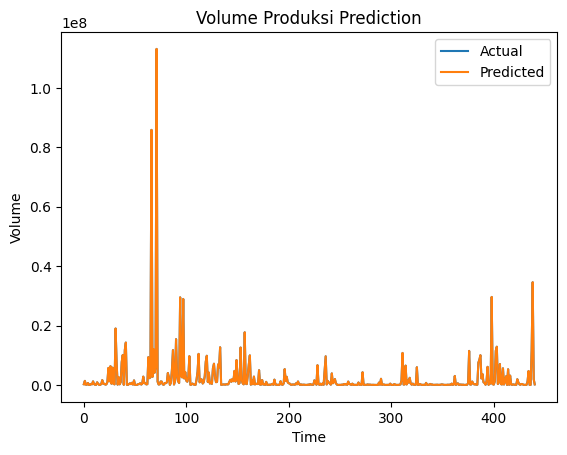

In [44]:
# 5. Visualisasi
plt.plot(y_test, label='Actual')
plt.plot(test_predict, label='Predicted')
plt.title('Volume Produksi Prediction')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()
plt.show()

**Analisis**




Data set yang digunakan diatas adalah data set adalah data set Volume produksi lele dan nilai produksi lele di semua provinsi di Indonesia dalam tahun 2019 - 2023 yang diambil dari Badan Pusat Statistik


Analisis yang digunakan menggunakan Regresi Linear hasil nya berupa MSE 1.5820063466282613e-10 yang berarti mendekati 0 menunjukkan prediksi yang akurat sedangkan R^2 nya 1.0 yang berarti fitur model yaitu (Tahun, volume produksi, dan nilai produksi) cocok dengan variabel target (volume produksi)


Model Machine Learning yang saya gunakan adalah menggunakan LSTM.
- Pada tahap pemrosesan data saya mendefinisikan tahun, nilai produksi, dan volume produksi sebagai DataFrame dan digunakan sebagai fitur untuk model.
- Membagi dataset pelatihan dengan menggunakan 80% dari total data, lalu data dibagi menjadi 2 set yaitu train data untuk melatih model dan test data untuk mengevaluasi model
- Mendefinisikan dataset untuk LSTM menggunakan fungsi create_dataset untuk membuat data sesuai format LSTM, membuat urutan input X dan Y sebagai nilai target kemudian menetapkan nilai target ke volume produksi lalu menggunakan parameter look_back = 3 untuk menggunakan data dari 3 tahun sebelumnya untuk memprdiksi volume produksi di tahun seterusnya
- Membuat model deep learning dengan menggunakan LSTM untuk memprediksi time series volume produksi ikan lele
- Dalam menggunakan LSTM semakin banyak unit data yang digunakan semakin kompleks pola yang dipelajari oleh model sehingga meningkatkan waktu pelatihan dan risiko overfitting
- Melatih model dari data historis yang disediakan dari x_train dan y_train dan menggunakan pengoptimal Adam untuk menyesuaikan parameter model untuk meminimalisir kesalahan prediksi
- Mengevaluasi model menggunakan metrik MSE, RMSE, dan R^2 untuk melihat hasil evaluasinya guna mengetahui keakuratan model dalam memprediksi volume produksi ikan lele
- Memvisualisasikan hasil prediksi volume produksi ikan lele dengan menggunakan grafik garis yang membandingkan data volume produksi ikan lele aktual dengan hasil prediksi model yang bertujuan untuk melihat akurasi model

Kesimpulan
Dalam menggunakan Model LSTM harus memiliki dataset yang memiliki jumlah data yang cukup, data time series serta data harus diberi label jika menggunakan data yang kurang baik maka beresiko mengalami overfitting sehingga mempengaruhi tingkat akurasi dari model